In [1]:
import os
os.chdir("..")
os.chdir("src")

In [2]:
from evaluate_bertopic import load_model_outputs

In [4]:
topic_model, topics, probs = load_model_outputs("/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/models/bertopic/topn_7/best_model")

FileNotFoundError: [Errno 2] No such file or directory: '/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/models/bertopic/topn_7/best_model/topics.pkl'

In [2]:
from pathlib import Path
topn = 5
cluster_model = "kmeans"

In [3]:
best_model_path = Path(
            f"models/bertopic/topn_{str(topn)}/{cluster_model}/best_model/"
        )

In [4]:
best_model_path

PosixPath('models/bertopic/topn_5/kmeans/best_model')

In [ ]:
best_model_path.parent

In [11]:
import pickle

model_path = "/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/models/bertopic/topn_7/best_model"


with open(model_path + "/model.pkl", "rb") as file:
    topic_model = pickle.load(file)

In [16]:
embedding_model = "paraphrase-multilingual-MiniLM-L12-v2"
topic_model.save("model_test", serialization="safetensors", save_ctfidf=True, save_embedding_model=embedding_model)

In [17]:
from bertopic import BERTopic

In [18]:
model = BERTopic.load(path="src/model_test", embedding_model="paraphrase-multilingual-MiniLM-L12-v2")

RepositoryNotFoundError: 401 Client Error. (Request ID: Root=1-663a3576-500ddaf927350e1e67954b1c;850e075f-bb58-49b7-8b53-9966ca21b460)

Repository Not Found for url: https://huggingface.co/src/model_test/resolve/main/topics.json.
Please make sure you specified the correct `repo_id` and `repo_type`.
If you are trying to access a private or gated repo, make sure you are authenticated.
Invalid username or password.

In [9]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json

In [10]:
def read_json_metrics(base_path, model_type):
    metrics_list = []
    # Itera de 5 a 10 para os diretórios topn_5 até topn_10
    for top_n in range(5, 11):
        file_path = os.path.join(base_path, model_type, f'best_model_topn_{top_n}', 'metrics', 'lda_metrics.json')
        if os.path.exists(file_path):
            with open(file_path, 'r') as file:
                data = json.load(file)
                data['mean_metrics']['top_n'] = top_n  # Adicionar a coluna top_n
                metrics_list.append(data['mean_metrics'])
    return metrics_list

In [13]:
base_path = '/home/bruno/mestrado/mestrado-ufrgs-cmp617-tce/models/lda'

lemmatization_data = read_json_metrics(base_path, 'lemmatization')
stemmer_data = read_json_metrics(base_path, 'stemmer')


df_lemmatization = pd.DataFrame(lemmatization_data)
df_stemmer = pd.DataFrame(stemmer_data)

In [17]:
df_lemmatization["nlp_normalization_method"] = "lemmatization"
df_stemmer["nlp_normalization_method"] = "stemmer"

In [21]:
df = pd.concat([df_lemmatization, df_stemmer])[["nlp_normalization_method", "top_n", "c_npmi_mean", "c_npmi_std", "c_v_mean", "c_v_std"]]

In [22]:
df

,nlp_normalization_method,top_n,c_npmi_mean,c_npmi_std,c_v_mean,c_v_std
0,lemmatization,5,0.123652,0.041723,0.626189,0.047896
1,lemmatization,6,0.127961,0.024533,0.607401,0.040466
2,lemmatization,7,0.148054,0.006471,0.660831,0.008837
3,lemmatization,8,0.140924,0.008078,0.637085,0.014221
4,lemmatization,9,0.139115,0.007452,0.636923,0.013164
5,lemmatization,10,0.115668,0.015097,0.574521,0.021836
0,stemmer,5,0.148376,0.014752,0.671960,0.020013
1,stemmer,6,0.168838,0.026550,0.650475,0.035636
2,stemmer,7,0.160468,0.013117,0.654544,0.024474
3,stemmer,8,0.125759,0.021710,0.617198,0.028213


In [3]:
df = df.sort_values(by=["topn", "nlp_normalization_method"])

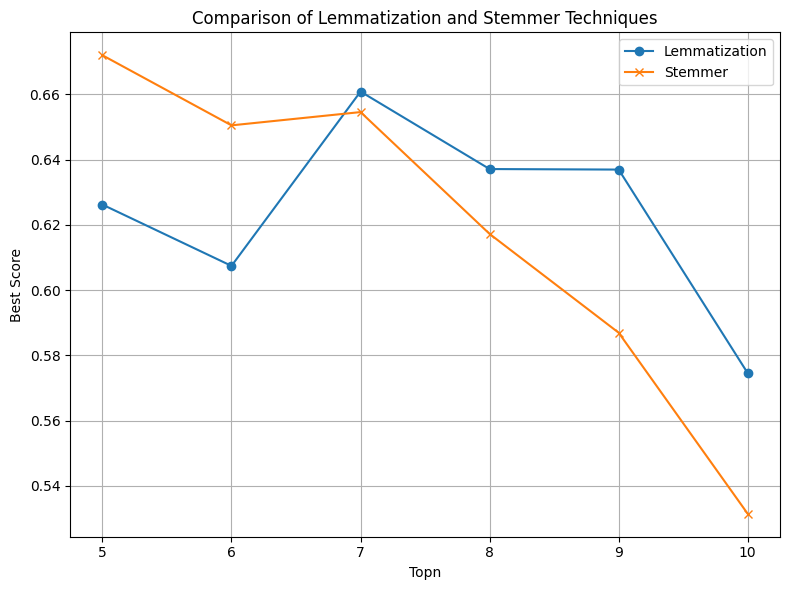

In [24]:
# Filtrando os dados para cada categoria
lemmatization_data = df[df['nlp_normalization_method'] == 'lemmatization']
stemmer_data = df[df['nlp_normalization_method'] == 'stemmer']

# Criando o plot
plt.figure(figsize=(8, 6))
plt.plot(lemmatization_data['top_n'], lemmatization_data['c_v_mean'], label='Lemmatization', marker='o')
plt.plot(stemmer_data['top_n'], stemmer_data['c_v_mean'], label='Stemmer', marker='x')

# Adicionando título e legendas
plt.title('Comparison of Lemmatization and Stemmer Techniques')
plt.ylabel('Best Score')
plt.xlabel('Topn')
plt.legend()

# Ajustes para melhorar a aparência no LaTeX
plt.grid(True)
plt.tight_layout()

# Salvando o gráfico em formato PDF
# plt.savefig('/path/to/save/plot.pdf')

# Mostrar o gráfico
plt.show()


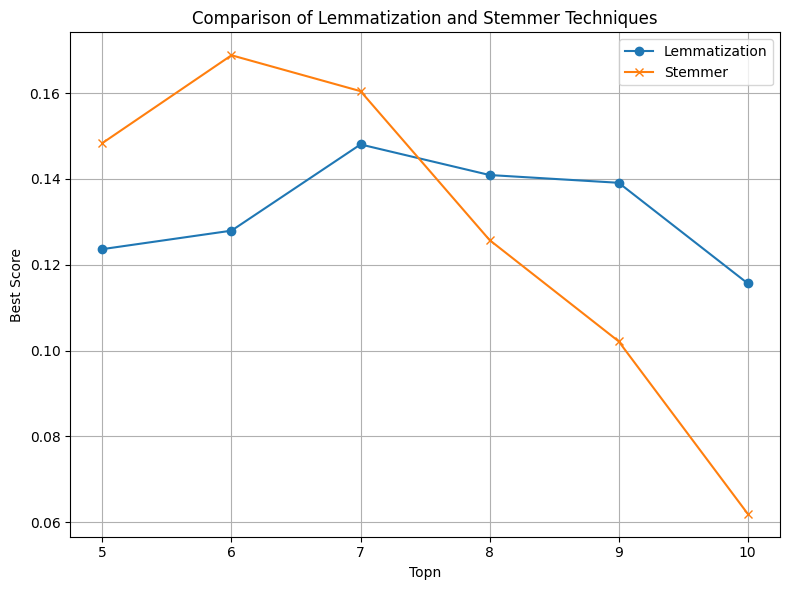

In [25]:
# Filtrando os dados para cada categoria
lemmatization_data = df[df['nlp_normalization_method'] == 'lemmatization']
stemmer_data = df[df['nlp_normalization_method'] == 'stemmer']

# Criando o plot
plt.figure(figsize=(8, 6))
plt.plot(lemmatization_data['top_n'], lemmatization_data['c_npmi_mean'], label='Lemmatization', marker='o')
plt.plot(stemmer_data['top_n'], stemmer_data['c_npmi_mean'], label='Stemmer', marker='x')

# Adicionando título e legendas
plt.title('Comparison of Lemmatization and Stemmer Techniques')
plt.ylabel('Best Score')
plt.xlabel('Topn')
plt.legend()

# Ajustes para melhorar a aparência no LaTeX
plt.grid(True)
plt.tight_layout()

# Salvando o gráfico em formato PDF
# plt.savefig('/path/to/save/plot.pdf')

# Mostrar o gráfico
plt.show()
